In [190]:
import matplotlib.pyplot as plt
import numpy as np
import os
import read_mist_models
from os import listdir
from os.path import isfile, join
import glob
from scipy.interpolate import *
import matplotlib.cm as cm

# Loading in the isochrones

In [2]:
eep = read_mist_models.EEP('MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\\30000M.track.eep')
print('available columns: ', eep.hdr_list)

Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\30000M.track.eep
available columns:  ['star_age', 'star_mass', 'star_mdot', 'he_core_mass', 'c_core_mass', 'o_core_mass', 'log_L', 'log_L_div_Ledd', 'log_LH', 'log_LHe', 'log_LZ', 'log_Teff', 'log_abs_Lgrav', 'log_R', 'log_g', 'log_surf_z', 'surf_avg_omega', 'surf_avg_v_rot', 'surf_num_c12_div_num_o16', 'v_wind_Km_per_s', 'surf_avg_omega_crit', 'surf_avg_omega_div_omega_crit', 'surf_avg_v_crit', 'surf_avg_v_div_v_crit', 'surf_avg_Lrad_div_Ledd', 'v_div_csound_surf', 'surface_h1', 'surface_he3', 'surface_he4', 'surface_li7', 'surface_be9', 'surface_b11', 'surface_c12', 'surface_c13', 'surface_n14', 'surface_o16', 'surface_f19', 'surface_ne20', 'surface_na23', 'surface_mg24', 'surface_si28', 'surface_s32', 'surface_ca40', 'surface_ti48', 'surface_fe56', 'log_center_T', 'log_center_Rho', 'center_degeneracy', 'center_omega', 'center_gamma', 'mass_conv_core', 'center_h1', 'center_he4', 'center_c12', 'center_n14', 'center_o16', 'center_

In [199]:
def get_mist_data(dir_):
    dir_list = glob.glob(dir_+"\*.eep", recursive=True)
    age, mass, mdot, log_L,log_T = [],[],[],[],[]
    for file in dir_list:
        eep = read_mist_models.EEP(file)
        age.append(eep.eeps['star_age'])
        mass.append(eep.eeps['star_mass'])
        mdot.append(eep.eeps['star_mdot'])
        log_L.append(eep.eeps['log_L'])
        log_T.append(eep.eeps['log_Teff'])
    return age, mass, mdot, log_L,log_T
           
age, mass, mdot, log_L,log_T = get_mist_data("MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS")

Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00010M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00015M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00020M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00025M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00030M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00031M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00032M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00033M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00034M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00035M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00036M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00037M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00038M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_

Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00270M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00272M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00274M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00276M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00278M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00280M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00300M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00320M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00340M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00360M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00380M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00400M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_EEPS\00420M.track.eep
Reading in: MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_

# Interpolating L_stable. Using interpolate.griddata, exploring cubic and linear fits, both zoomed into the area of interest and using the whole data set

In [158]:
Asol = 4.603e9

def flatten(arr):
    new_arr = []
    for m in arr:
        new_arr.extend(list(m))
    return new_arr

#clean the data, remove non-monotonic regions and track that don't have log_l = 0
age2,mass2,log_L2 = [],[],[]
for a_list, m_list, l_list,i in  zip(age, mass,log_L,range(len(mass))):
    mono_inds = monotonic_indices(l_list)
    l_list = np.array(l_list)[mono_inds]
    a_list = np.array(a_list)[mono_inds]
    m_list = np.array(m_list)[mono_inds]        
    if((np.any(np.array(l_list) <= 0)) and (np.any(np.array(l_list) >= 0))):
        age2.append(a_list),mass2.append(m_list),log_L2.append(l_list)


a,b=0,np.size(mass2)
m2,a2,l2 =flatten(mass2[a:b]), flatten(age2[a:b]),flatten(log_L2[a:b])
x,y,z = m2,a2,l2
linear_interp = griddata((x, y), z, (1,Asol), method= "linear")
cubic_interp = griddata((x, y), z, (1,Asol), method= "cubic")

C:\Users\Matthew\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [159]:
print(linear_interp,cubic_interp)

0.04365056100707131 0.04387270787327787


In [160]:
l_stable = cubic_interp
print(l_stable)

0.04387270787327787


Finding an L_stable that's a bit closer than David's value but I don't trust this interpolation method. I'll look for something better

# Interpolating mass across time for fixed L_stable. Filtering out tracks which don't contain L_stable

In [166]:
time = np.linspace(4e9,6e10,30)
lum = np.linspace(l_stable, l_stable,30)

mass_interp_linear = griddata((a2,l2), m2, (time,lum), method= "linear")

No handles with labels found to put in legend.


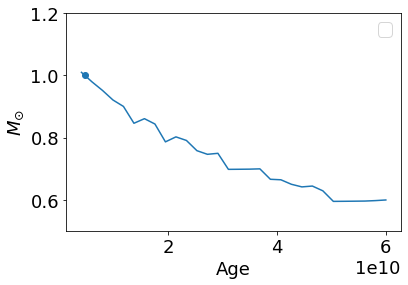

In [187]:
plt.rcParams.update({'font.size': 18})
plt.plot(time,mass_interp_linear)
plt.scatter(Asol,1)
plt.ylim(0.5,1.2)
plt.xlabel("Age")
plt.ylabel(r"$M_{\odot}$")
plt.legend()

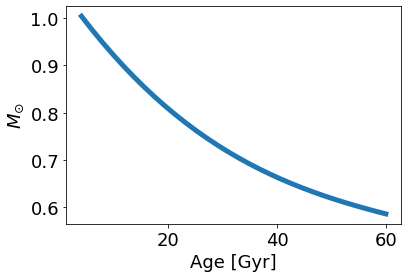

In [183]:
fit = np.polyfit(time, mass_interp_linear,3)
poly = np.poly1d(fit)
poly_fit = poly(time)
plt.plot(time/1e9, poly_fit,lw=5)
plt.xlabel("Age [Gyr]")
plt.ylabel(r"$M_{\odot}$")
plt.savefig("mass_vs_age_3dinterp.pdf",bbox_inches="tight")

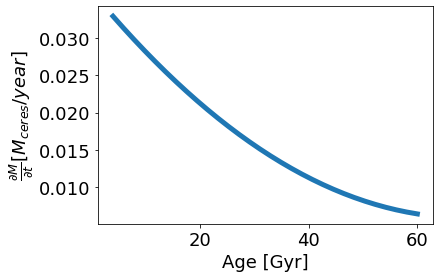

In [184]:
m_sol, m_ceres = 1.98847e30,9.1e20
poly_der = np.polyder(poly)
poly_der_fit = poly_der(time)
plt.plot(time/1e9, -poly_der_fit*m_sol/m_ceres,lw=5)
plt.xlabel("Age [Gyr]")
plt.ylabel(r"$\frac{\partial M}{\partial t} [M_{ceres}/year]$")
plt.savefig("dmdt_vs_age_3dinterp.pdf",bbox_inches="tight")

# Instead of the 3d interpolation, interpolate along both mass and age for L = l_stable + offset so that the sun lands on this track

Text(0, 0.5, 'mass')

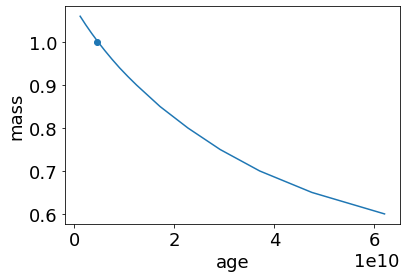

In [175]:
def monotonic_indices(arr):
    mon_arr = [[]]
    for x in range(len(arr)-1):
        if(arr[x+1] > arr[x]):
            mon_arr[-1].append(x)
        else: mon_arr.append([x])
    max_ind = 0
    max_size = 0
    for i in range(len(mon_arr)):
        if(np.size(mon_arr[i]) > max_size):
            max_size = np.size(mon_arr[i])
            max_ind = i
    return mon_arr[max_ind]

def interp_2d(age,mass,log_L,l_sun):
    m_interp, a_interp = [],[]
    for a_list, m_list, l_list,i in  zip(age, mass,log_L,range(len(mass))):
        mono_inds = monotonic_indices(l_list)
        l_list = np.array(l_list)[mono_inds]
        a_list = np.array(a_list)[mono_inds]
        m_list = np.array(m_list)[mono_inds]        
        if((np.any(np.array(l_list) <= 0)) and (np.any(np.array(l_list) >= 0))):
            f_m = interp1d(l_list,m_list, kind="cubic")
            f_a = interp1d(l_list,a_list, kind="cubic")
            m_interp.append(f_m(l_sun))
            a_interp.append(f_a(l_sun))
    return np.array(m_interp), np.array(a_interp)

l_offset = 0.035
l_stable = 0.015811547420965237
mono_inds = monotonic_indices(log_L[20])
m_interp, a_interp = interp_2d(age,mass,log_L, l_offset+l_stable)
plt.plot(a_interp, m_interp)
plt.scatter(4.6e9,1)
plt.xlabel("age")
plt.ylabel("mass")

In [176]:
print(np.power(10,l_stable+l_offset))

1.1241170821308417


In [177]:
import matplotlib.ticker as ticker


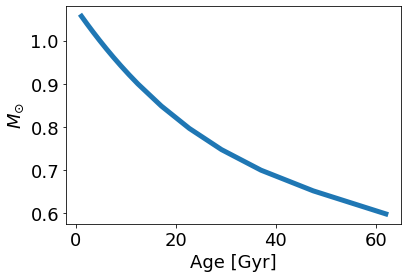

In [185]:
fit = np.polyfit(a_interp, m_interp,3)
poly = np.poly1d(fit)
poly_fit = poly(a_interp)
plt.plot(a_interp/1e9, poly_fit, lw=5)
plt.xlabel("Age [Gyr]")
plt.ylabel(r"$M_{\odot}$")
plt.savefig("mass_vs_age_2dinterp.pdf",bbox_inches="tight")

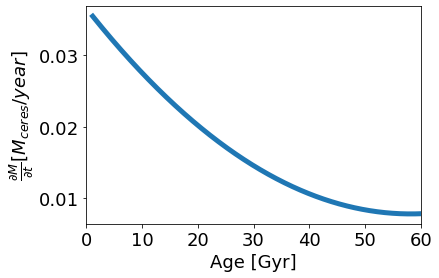

In [186]:
m_sol, m_ceres = 1.98847e30,9.1e20
poly_der = np.polyder(poly)
t = np.arange(np.min(a_interp), np.max(a_interp),20000)
poly_der_fit = poly_der(t)
plt.plot(t/1e9, -poly_der_fit*m_sol/m_ceres, lw=5)
plt.xlabel("Age [Gyr]")
plt.ylabel(r"$\frac{\partial M}{\partial t} [M_{ceres}/year]$")
plt.xlim(0,60)
plt.savefig("dmdt_vs_age_2dinterp.pdf",bbox_inches="tight")

# Generalizing this for different luminosities and mass ranges

In [200]:
Asol = 4.603e9
time = np.linspace(4e9,6e10,30)

#clean the data, remove non-monotonic regions and track that don't have log_l = 0
age_clean,mass_clean,log_L_clean = [],[],[]
for a_list, m_list, l_list,i in  zip(age, mass,log_L,range(len(mass))):
    mono_inds = monotonic_indices(l_list)
    l_list = np.array(l_list)[mono_inds]
    a_list = np.array(a_list)[mono_inds]
    m_list = np.array(m_list)[mono_inds]    
    age_clean.append(a_list),mass_clean.append(m_list),log_L_clean.append(l_list)

In [238]:
mass_arr = []
mass_range = np.arange(0.2,1.2,0.05)
l_stabs = []
for m_star in mass_range:
    m2,a2,l2 =flatten(mass_clean), flatten(age_clean),flatten(log_L_clean)
    l_stable = griddata((m2, a2), l2, (m_star,Asol), method= "linear")
    l_stabs.append(l_stable)
    
    age2,mass2,log_L2 = [],[],[]
    for a_list, m_list, l_list,i in  zip(age_clean, mass_clean,log_L_clean,range(len(mass))):
        if((np.any(np.array(l_list) <= l_stable)) and (np.any(np.array(l_list) >= l_stable))):
            age2.append(a_list),mass2.append(m_list),log_L2.append(l_list)

    lum = np.linspace(l_stable, l_stable,30)
    mass_interp_linear = griddata((a2,l2), m2, (time,lum), method= "linear")
    mass_arr.append(mass_interp_linear)

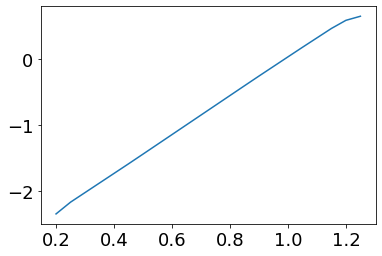

In [217]:
plt.plot(mass_range, l_stabs)

In [218]:
CMAP = plt.cm.coolwarm

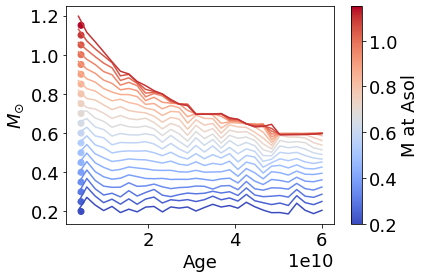

In [239]:
fig = plt.figure() 
plt.xlabel("Age")
plt.ylabel(r"$M_{\odot}$")
colors = cm.jet(mass_range)

for i in range(len(mass_arr)):
    plt.plot(time,mass_arr[i], c=CMAP(i/len(mass_arr)))

plt.scatter(np.linspace(Asol,Asol,len(mass_range)), mass_range, cmap=CMAP, c=mass_range)
plt.colorbar(label="M at Asol")

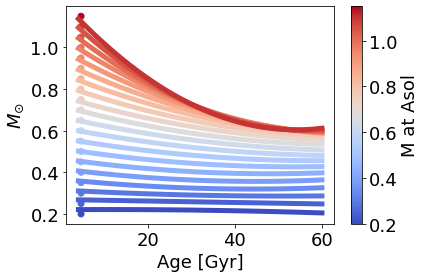

In [249]:
plt.figure()
plt.xlabel("Age [Gyr]")
plt.ylabel(r"$M_{\odot}$")

for i in range(len(mass_arr)):
    fit = np.polyfit(time, mass_arr[i],2)
    poly = np.poly1d(fit)
    poly_fit = poly(time)
    plt.plot(time/1e9, poly_fit, lw=5, c=CMAP(i/len(mass_arr)))
plt.scatter(np.linspace(Asol,Asol,len(mass_range))/1e9, mass_range, cmap=CMAP, c=mass_range)
plt.colorbar(label="M at Asol")
plt.savefig("mass_vs_age.pdf",bbox_inches="tight")

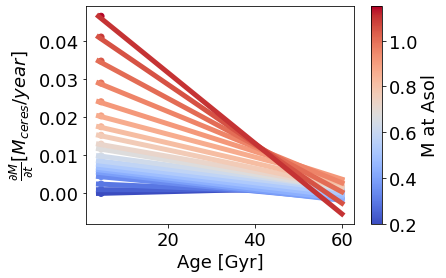

In [250]:
plt.figure()
plt.xlabel("Age [Gyr]")
plt.ylabel(r"$\frac{\partial M}{\partial t} [M_{ceres}/year]$")

dmdt_0 = []
for i in range(len(mass_arr)):
    fit = np.polyfit(time, mass_arr[i],2)
    poly = np.poly1d(fit)
    poly_der = np.polyder(poly)
    poly_der_fit = poly_der(time)
    plt.plot(time/1e9, -poly_der_fit*m_sol/m_ceres, lw=5, c=CMAP(i/len(mass_arr)))
    dmdt_0.append(-poly_der_fit[0]*m_sol/m_ceres)
plt.scatter(np.linspace(Asol,Asol,len(mass_range))/1e9, dmdt_0, cmap=CMAP, c=mass_range)
plt.colorbar(label="M at Asol")

plt.savefig("dmdt_vs_age.pdf",bbox_inches="tight")

# Accounting for change in flux(orbit) due to loss of mass

$T^2 = \frac{4\pi^2}{GM}r^3$

$T = \frac{2\pi r}{v}$

$v = \sqrt{\frac{GM}{r}}$

$T^2 = 